<a href="https://colab.research.google.com/github/trevor-webster/2024Fall-MOCS/blob/main/MOCS_cellular_automata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Functions to decode and run cellular automata



In [1]:
import numpy as np

# Ruleset for binary 1D CA
# current pattern:	111	110	101	100	011	010	001	000
# new state:      	 ?   ?	 ?	 ?	 ?	 ?	 ?	 ?
def run_1d_CA(steps, tape):
    rule = np.zeros((2, 2, 2))
    rule[1,1,1] = 1
    rule[1,1,0] = 0
    rule[1,0,1] = 1
    rule[0,1,1] = 1
    rule[1,0,0] = 1
    rule[0,1,0] = 0
    rule[0,0,1] = 0
    rule[0,0,0] = 0
    N = tape.shape[0] #size (length) of the system
    #2D data structure to record all time steps: t-th row = system at time t
    tapes = np.zeros((steps, N),dtype=int)
    tapes[0, :] = tape #initial conditions
    for i in range(steps-1): #for every time step
        for j in range(N): #for every cell
            #check state of cell j and neighborhood
            left = tapes[i, (j-1)%N]
            center = tapes[i, j%N]
            right = tapes[i, (j+1)%N]
            #apply the rule on cell j
            tapes[(i+1), j] = rule[left,center,right]
    return tapes

# Example of a hardcoded ruleset for Rule 30
# current pattern:	111	110	101	100	011	010	001	000
# new state:      	 0   0	 0	 1	 1	 1	 1	 0
def run_rule_30(steps, tape):
    rule = np.zeros((2, 2, 2))
    rule[1,1,1] = 0
    rule[1,1,0] = 0
    rule[1,0,1] = 0
    rule[1,0,0] = 1
    rule[0,1,1] = 1
    rule[0,1,0] = 1
    rule[0,0,1] = 1
    rule[0,0,0] = 0
    N = tape.shape[0]
    tapes = np.zeros((steps, N),dtype=int) #data structure to record all time steps
    tapes[0, :] = tape #initial conditions
    for i in range(steps-1): #for every time step
        for j in range(N): #for every cell
            #check state of cell j and neighborhood
            left = tapes[i, (j-1)%N]
            center = tapes[i, j%N]
            right = tapes[i, (j+1)%N]
            #apply the rule on cell j
            tapes[(i+1), j] = rule[left,center,right]
    return tapes

# Functions to decode a cellular automaton rule from an integer
# using the Wolfram convention and binary representation
# https://mathworld.wolfram.com/ElementaryCellularAutomaton.html
def decode_rule(code, S, K):
    rule = np.zeros(S**K, dtype=int) #all rules of S states & K cells
    i = S**K-1 #start at the end, indexed by zero
    while code > 0: #https://en.wikipedia.org/wiki/Wolfram_code
        rule[i] = code % S
        code = code // S
        i -= 1
    return rule[::-1] #reverse the ruleset

# Function to run a cellular automaton rule given an initial
# N-sized tape. Returns a 'steps' x 'N' matrix
def run_cellauto(S, K, rule, steps, tape):
    N = tape.shape[0]
    tapes = np.zeros((steps, N)) #data structure to record all time steps
    tapes[0, :] = tape #initial conditions
    for i in range(steps-1): #for every time step
        for j in range(N): #for every cell
            #calcule the rule index (https://en.wikipedia.org/wiki/Wolfram_code)
            #modulo (%) applies periodic boundary condition
            idx = int(sum([S**(K-(k+K//2)-1)*tapes[i, (j+k)%N] for k in range(-(K//2), K//2+1)]))
            #apply the rule on cell j
            tapes[(i+1)%N, j] = rule[idx]
    return tapes

In [2]:
N, S, K, steps = 32, 2, 3, 32 #size, states, neighbors, steps
rule = 110 #rule number
decode_rule(110, S, K )

array([0, 1, 1, 1, 0, 1, 1, 0])

**Main code to run a cellular automaton**

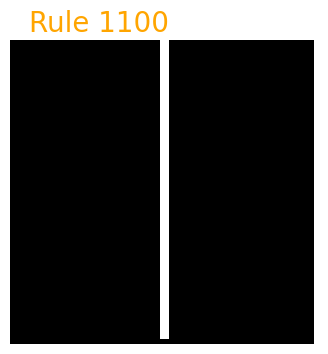

In [6]:
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib import patches
import random

from IPython import display
from time import sleep

# Parameters
N, S, K, steps = 32, 2, 3, 32 #size, states, neighbors, steps
rule = 110 #rule number
tape = np.zeros(N) #initial conditions of zero
tape[N//2] = 1 #initial conditions
#tape = np.random.randint(2, size=N) #random initial conditions

# Run the CA
#tapes = run_1d_CA(steps,tape)
#tapes = run_rule_30(steps,tape)
tapes = run_cellauto(S, K, decode_rule(rule, S, K), steps, tape) #run model

# Plot everything slowly, one generation at a time
fig, ax = plt.subplots(figsize=(4, 4))
ax.set_xlim(0,N)
ax.set_ylim(0,steps)
plt.axis('off')
ax.set_aspect('equal')
for i in range(steps):
    temp = np.zeros((steps,N))
    temp[0:i,:] = tapes[0:i,:]
    plt.imshow(np.flipud(temp), cmap=plt.get_cmap(cm.bone))
    display.display(plt.gcf())
    display.clear_output(wait=True)

# Add rule label
#ax.text(2, steps+0.5, f'Cellular automaton', color='Orange', fontsize=20)
ax.text(2, steps+0.5, f'Rule {rule}', color='Orange', fontsize=20)
plt.show()

# Functions to visualize cellauto rules

In [5]:
import numpy as np
from matplotlib import cm
from matplotlib import patches
from matplotlib import pyplot as plt

def visualize_rule(rule, S, K, grid=False):
    n_configs = S**K #number of rules for K cells in one of S states
    sqrt_n_configs = int(np.ceil(np.sqrt(n_configs)))

    if grid:
        fig, ax = plt.subplots(figsize=(sqrt_n_configs*(K+1), sqrt_n_configs*3))
    else:
        fig, ax = plt.subplots(figsize=(n_configs*(K+1), 2))

    plt.axis('off')
    ax.set_aspect('equal')

    if grid:
        ax.set_xlim(-S//2-1,sqrt_n_configs*(K+1))
        ax.set_ylim(-1,sqrt_n_configs*3)
    else:
        ax.set_xlim(-S//2-1,n_configs*(K+1))
        ax.set_ylim(-1,2)

    colors = cm.bone(np.linspace(0,1,S))

    config_i = 0
    config = [(config_i//(S**k))%S for k in range(K)]
    for i in range(sqrt_n_configs if grid else n_configs):
        for j in range(sqrt_n_configs if grid else 1):
            if grid:
                xy = np.array((j*(K+1), (sqrt_n_configs-i-1)*3))
            else:
                xy = np.array(((n_configs-i-1)*(K+1), 0))

            ax.add_patch(patches.Rectangle(
                xy, 1, 1,
                color=colors[rule[config_i]], fill=True
            ))
            ax.add_patch(patches.Rectangle(
                xy, 1, 1,
                color='black', fill=False
            ))

            for k in range(K):
                ax.add_patch(patches.Rectangle(
                    xy + np.array((k-K//2,1)), 1, 1,
                    color=colors[config[k]], fill=True
                ))
                ax.add_patch(patches.Rectangle(
                    xy + np.array((k-K//2,1)), 1, 1,
                    color='black', fill=False
                ))

            config_i += 1
            config = [(config_i//(S**k))%S for k in range(K)][::-1]
            if config_i >= n_configs:
                return fig, ax

In [11]:
N, S, K, steps = 32, 2, 3, 32 #size, states, neighbors, steps
rule = 1 #rule number
decode_rule(rule, S, K )

array([1, 0, 0, 0, 0, 0, 0, 0])

110


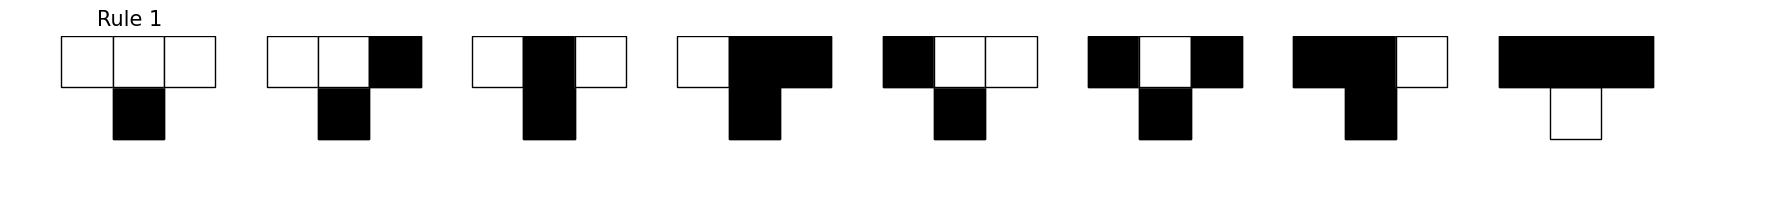

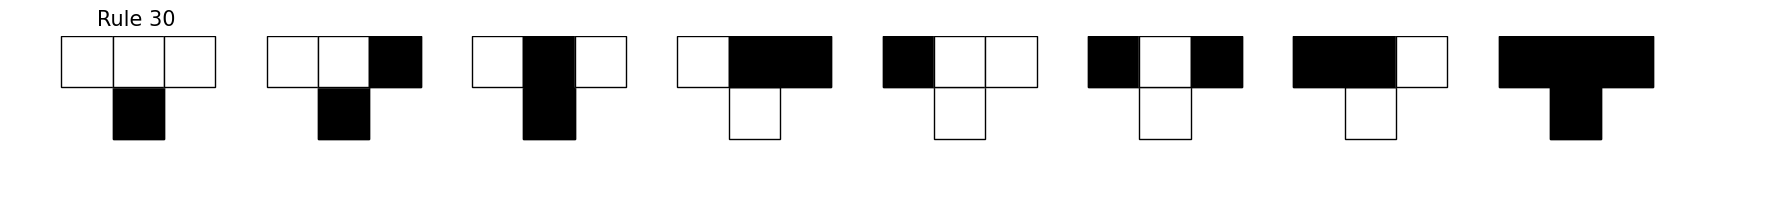

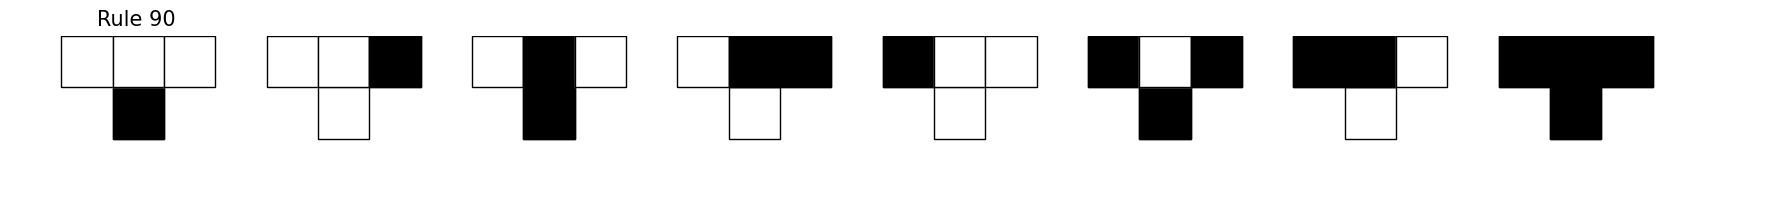

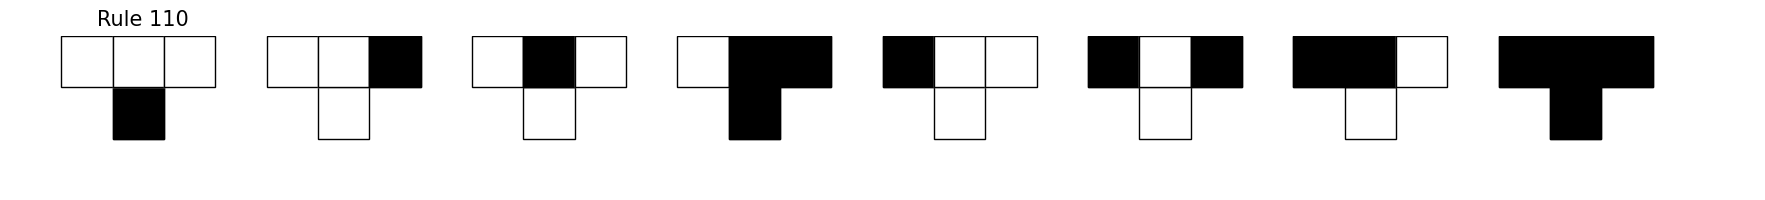

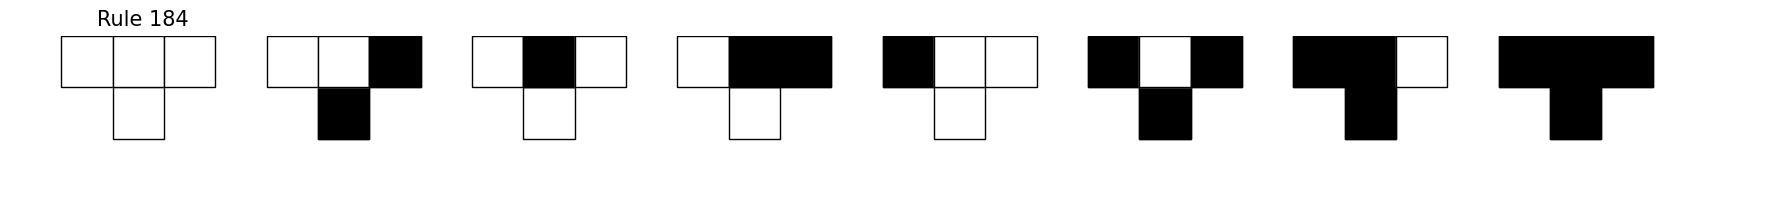

In [7]:

for code in [1, 30, 90, 110, 184]:
    fig, ax = visualize_rule(decode_rule(code, 2, 3), 2, 3, grid=False)
    ax.text(-.3, 2.2, f'Rule {code}', c='black', fontsize=15)
    plt.show() #remember white = 1 (or on) and black = 0 (or off)